<br>
<h1 style = "font-size:40px; font-family:monospace ; font-weight : bold; color : #3C0096; text-align: center; border-radius: 5px 25px;">SA-2021 Week 3 Graded Assignment</h1>
<br>

<br>
<h1 style = "font-size:30px; font-family:monospace ; font-weight : bold; color : #AE0052; text-align: center; border-radius: 10px 10px;">☔Rain Prediction in Australia☔</h1>
<br>

![](https://media0.giphy.com/media/tkMeNtj9FQYx2/giphy.gif)

<span style="font-size:20px;color:#0026D8;font-weight : bold">Dataset Description:</span>

**This dataset contains daily weather observations from numerous Australian weather stations.**
- **Date** - The date of observation<br>
- **Location** - The common name of the location of the weather station<br>
- **MinTemp** - The minimum temperature in degrees celsius<br>
- **MaxTemp** - The maximum temperature in degrees celsius<br>
- **Rainfall** - The amount of rainfall recorded for the day in mm<br>
- **Evaporation** - The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
- **Sunshine** - The number of hours of bright sunshine in the day.<br>
- **WindGustDir** - The direction of the strongest wind gust in the 24 hours to midnight<br>
- **WindGustSpeed** - The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
- **WindDir9am** - Direction of the wind at 9am<br>
- **WindDir3pm** - Direction of the wind at 3pm<br>
- **WindSpeed9am** - Wind speed (km/hr) averaged over 10 minutes prior to 9am<br>
- **WindSpeed3pm** - Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br>
- **Humidity9am** - Humidity (percent) at 9am<br>
- **Humidity3pm** - Humidity (percent) at 3pm<br>
- **Pressure9am** - Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
- **Pressure3pm** - Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
- **Cloud9am** - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of                    eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates                    completely clear sky whilst an 8 indicates that it is completely overcast.<br>
- **Cloud3pm** - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description                of the values<br>
- **Temp9am** - Temperature (degrees C) at 9am<br>
- **Temp3pm** - Temperature (degrees C) at 3pm<br>
- **RainToday** - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br>
- **RainTomorrow** - The target variable. Will it rain tomorrow?

### It is highly recommended to read the documentation before implementing any alogorithm.

- **Logistic Regression** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
- **SVM** : https://scikit-learn.org/stable/modules/svm.html <br>
- **Confusion Matrix** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html <br>
- **Plot Confusion Matrix** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html <br>
- **ROC_AUC Score** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score <br>
- **Classification Report** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html <br>
- **Label Encoder** : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html <br>
- **Label Binarizer** : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html <br>
- **Standard Scaler** : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html <br>
- **Cross Val Score** : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html <br>



In [1]:
## ======== Run this Cell as it is======== ##

from IPython.display import HTML
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 2.5%;
	color: #13003A;
	box-shadow: 
		inset 0 0 0 1px rgba(53,86,129, 1), 
		inset 0 0 5px rgba(53,86,129, 1),
		inset -285px 0 35px white;
	border-radius: 0 10px 0 15px;
	background: #fff
    
}
</style>
""")


## ================================ ##

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">✅ Importing Required Libraries</h1>

In [2]:
## ======== YOUR CODE HERE ======== ##

## Import numpy, pandas, matplotlib, seaborn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
## Import Logistic regression and SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm

## Import Confusion matrix, plot confusion matrix, classification report, accuracy score, auc-roc score and roc curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
## Import Label encoder, label binarizer and Standard Scaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
## ================================ ##

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Read the data </h1>

In [3]:
## ======== YOUR CODE HERE ======== ##
df=pd.read_csv("SA2021_W3_Data.csv")
df.head()
## ================================ ##

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2856,11,18.3,35.4,0.0,10.7,8.2,15,31,0,...,17,14,1012.8,1010.7,3,7,26.3,34.0,0,1
1,575,0,12.0,21.1,0.0,2.4,4.9,11,22,15,...,70,60,1022.3,1020.2,2,7,16.2,19.4,0,0
2,2037,6,11.9,17.0,1.6,5.6,0.8,5,48,4,...,71,88,1008.4,1004.7,7,7,14.6,13.3,1,1
3,2010,19,1.3,10.2,4.2,2.6,4.4,15,33,15,...,87,64,1018.4,1016.8,7,7,3.8,8.5,1,0
4,2895,18,23.7,31.5,0.0,11.0,12.1,4,35,2,...,53,50,1014.2,1010.2,3,1,29.1,30.4,0,0


In [4]:
## Check the shape of data. It should be (24196,23)

## ======== YOUR CODE HERE ======== ##
df.shape

## ================================ ##

(24196, 23)

In [5]:
## Apply describe on dataframe

## ======== YOUR CODE HERE ======== ##

df.describe()
## ================================ ##

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,...,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000
mean,1702.554430,11.126880,13.281232,23.124078,3.008857,5.114329,6.700591,7.752273,42.371880,7.315424,...,69.505621,55.335345,1016.774682,1014.508518,4.767152,4.926682,17.609216,21.493420,0.293396,0.453918
std,837.645705,6.397324,6.084032,6.681013,8.399269,3.549384,3.958287,4.788052,14.221336,4.634019,...,17.671186,20.907040,6.987625,6.877345,2.741416,2.586083,6.189396,6.535474,0.455328,0.497882
min,0.000000,0.000000,-4.700000,4.100000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,...,3.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,984.000000,6.000000,8.600000,17.900000,0.000000,2.400000,3.400000,3.000000,31.000000,3.000000,...,58.000000,41.000000,1012.200000,1009.900000,2.000000,3.000000,12.700000,16.500000,0.000000,0.000000
50%,1651.000000,11.000000,13.100000,22.700000,0.000000,4.400000,7.200000,8.000000,41.000000,7.000000,...,70.000000,56.000000,1016.800000,1014.400000,6.000000,6.000000,17.300000,21.100000,0.000000,0.000000
75%,2381.000000,17.000000,18.000000,28.100000,1.800000,7.000000,10.000000,12.000000,50.000000,11.000000,...,83.000000,70.000000,1021.400000,1019.000000,7.000000,7.000000,22.300000,26.200000,1.000000,1.000000
max,3415.000000,22.000000,31.400000,46.800000,206.200000,59.800000,14.500000,15.000000,122.000000,15.000000,...,100.000000,100.000000,1040.200000,1037.000000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Check missing values in the dataset and fill them by any method</h1>

In [6]:
## Check if there any null value in the dataset.
df2=df.copy()
## ======== YOUR CODE HERE ======== ##
df2.isnull().sum().max()
## ================================ ##

0

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Use Feature Encoding :</h1>

In [7]:
## ======== YOUR CODE HERE ======== ##

## Use one hot encoding on dataframe
col_enc=df.select_dtypes(include="object").columns.values
df_enc=pd.get_dummies(df,columns=col_enc)
df_enc.shape
df.dtypes

#no encoding required 

## ================================ ##


Date               int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed      int64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Split the data into train and test.</h1>

In [8]:
## ======== YOUR CODE HERE ======== ##
 
## Test size should be 25% of the full dataset and use random state = 2021
X=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2021)

## ================================ ##

In [9]:
## ======== YOUR CODE HERE ======== ##

   ## Let us print the shapes:
    
print("X_train:",X_train.shape ) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test

## ================================ ##

X_train: (18147, 22)
X_test: (6049, 22)
y_train: (18147,)
y_test: (6049,)


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Scale the data using Standard Scaler :</h1>

In [30]:
## Use Standard Scaler to scale the train and test data

## ======== YOUR CODE HERE ======== ##
scaler=StandardScaler()
X_trains=scaler.fit_transform(X_train)
X_tests=scaler.transform(X_test)


## ================================ ##

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Train a Logistic Regression with all default parameters</h1>

In [11]:
## Use Random state = 2021 and fit the LR model

## ======== YOUR CODE HERE ======== ##
logic=LogisticRegression(random_state=2021)
logic.fit(X_trains,y_train)


## ================================ ##

LogisticRegression(random_state=2021)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Plot Confusion Matrix using plot_confusion_matrix module :</h1>

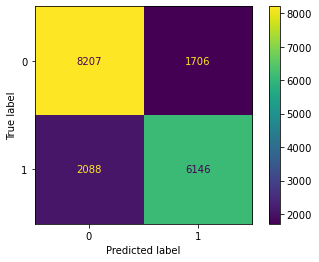

In [12]:
## ======== YOUR CODE HERE ======== ##

## Use display labels as per your choice.
plot_confusion_matrix(logic,X_trains,y_train)

plt.show()



## ================================ ##

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print out Classification Report for LR :</h1>

In [13]:
## ======== YOUR CODE HERE ======== ##

print(classification_report(y_train,logic.predict(X_trains)))





## ================================ ##


              precision    recall  f1-score   support

           0       0.80      0.83      0.81      9913
           1       0.78      0.75      0.76      8234

    accuracy                           0.79     18147
   macro avg       0.79      0.79      0.79     18147
weighted avg       0.79      0.79      0.79     18147



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print Training and Testing Score along with Accuracy score for LR :</h1> 

In [14]:
## ======== YOUR CODE HERE ======== ##

print("traing score  ",accuracy_score(y_train,logic.predict(X_trains)))
print("testing score  ",accuracy_score(y_test,logic.predict(X_tests)))



## ================================ ##

traing score   0.7909296302419133
testing score   0.7842618614647049


In [15]:
## ======== YOUR CODE HERE ======== ##

## Print Accuracy Score for LR

print("accuracy LR train ",logic.score(X_trains,y_train))
print("accuracy LR test ",logic.score(X_tests,y_test))
## ================================ ##

accuracy LR train  0.7909296302419133
accuracy LR test  0.7842618614647049


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print ROC - AUC Score for LR :</h1> 

In [16]:
## ======== YOUR CODE HERE ======== ##


print("roc score: ",roc_auc_score(y_train,logic.predict(X_trains)))
print("roc score: ",roc_auc_score(y_test,logic.predict(X_tests)))
## ================================ ##

roc score:  0.7871600240528352
roc score:  0.780194340641776


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Train SVM with C = 50 and gamma = scale :</h1>

In [19]:
## ======== YOUR CODE HERE ======== ##

## Set probability = True 
svc = svm.SVC(C=50,gamma='scale',probability=True)
svc.fit(X_trains,y_train)

## ================================ ##

SVC(C=50, probability=True)

In [21]:
<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Plot Confusion Matrix for SVM :</h1>

SyntaxError: invalid syntax (<ipython-input-21-e98545c6d450>, line 1)

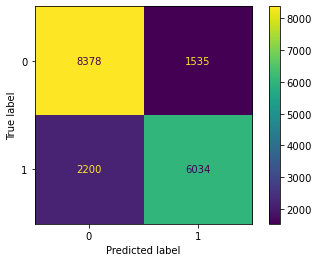

In [22]:
## ======== YOUR CODE HERE ======== ##

## Use display labels as per your choice.

plot_confusion_matrix(svc,X_trains,y_train)
plt.show()


## ================================ ##


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print out Classification Report for SVM :</h1>

In [24]:
## ======== YOUR CODE HERE ======== ##



print(classification_report(y_train,svc.predict(X_trains)))
print(classification_report(y_test,svc.predict(X_tests)))

## ================================ ##

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      9913
           1       0.80      0.73      0.76      8234

    accuracy                           0.79     18147
   macro avg       0.79      0.79      0.79     18147
weighted avg       0.79      0.79      0.79     18147

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      3300
           1       0.79      0.72      0.75      2749

    accuracy                           0.79      6049
   macro avg       0.79      0.78      0.78      6049
weighted avg       0.79      0.79      0.79      6049



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print out Accuracy score for SVM :</h1>

In [25]:
## ======== YOUR CODE HERE ======== ##

print(accuracy_score(y_train,svc.predict(X_trains)))

print(accuracy_score(y_test,svc.predict(X_tests)))
## ================================ ##

0.7941808563398909
0.7864109770209952


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print Training and Testing Score for SVM :</h1> 

In [26]:
## ======== YOUR CODE HERE ======== ##

print(svc.score(X_trains,y_train))
print(svc.score(X_tests,y_test))



## ================================ ##

0.7941808563398909
0.7864109770209952


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Plot ROC curve and calculate ROC - AUC score for SVM :</h1> 

Text(0.5, 1.0, 'roc curve')

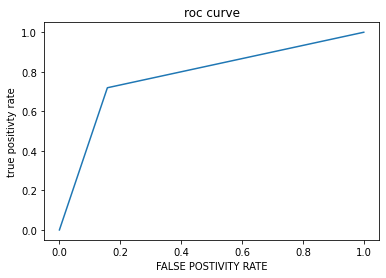

In [27]:
## ======== YOUR CODE HERE ======== ##

## Set appropriate X label, Y label and Title for the graph
fpr,tpr,thresh=roc_curve(y_test,svc.predict(X_test))
plt.plot(fpr,tpr)
plt.xlabel("FALSE POSTIVITY RATE")
plt.ylabel("true positivty rate")
plt.title("roc curve")

## ================================ ##

In [28]:
## ======== YOUR CODE HERE ======== ##

## Print out ROC score for SVM
print(roc_auc_score(y_train,svc.predict(X_train)))
print(roc_auc_score(y_test,svc.predict(X_test)))


## ================================ ##

0.7889839931425751
0.7807974249589382


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Train SVM with C = 1 and gamma = scale :</h1> 

In [34]:
## ======== YOUR CODE HERE ======== ##

## Train SVM with new mentioned parameters
svc1=svm.SVC(C=1,gamma='scale',probability=True)
svc1.fit(X_trains,y_train)

## ================================ ##

SVC(C=1, probability=True)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print out Classification Report for new SVM :</h1>

In [35]:
## ======== YOUR CODE HERE ======== ##

print(roc_auc_score(y_train,svc1.predict(X_trains)))
print(roc_auc_score(y_test,svc1.predict(X_tests)))


## ================================ ##

0.8322540177758792
0.8072020128531587


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Plot ROC curve and calculate ROC - AUC score for the new SVM :</h1> 

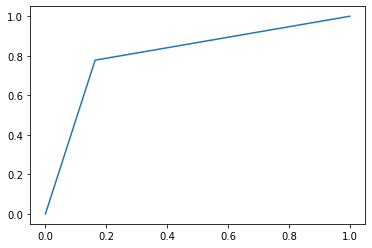

In [36]:
## ======== YOUR CODE HERE ======== ##
fpr1,tpr1,tresh1=roc_curve(y_test,svc1.predict(X_tests))
plt.plot(fpr1,tpr1)


## ================================ ##

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print Training and Testing Score along with accuracy score for the new SVM :</h1> 

In [37]:
## ======== YOUR CODE HERE ======== ##


print(accuracy_score(y_train,svc1.predict(X_trains)))

print(accuracy_score(y_test,svc1.predict(X_tests)))

## ================================ ##

0.8343527855843941
0.8098859315589354


In [38]:
## ======== YOUR CODE HERE ======== ##

## Print out Accuracy score for the new SVM

print(svc1.score(X_trains,y_train))
print(svc1.score(X_tests,y_test))

## ================================ ##

0.8343527855843941
0.8098859315589354


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Calculate Average Cross-Val score for the new SVM with 5 folds  :</h1> 

In [ ]:
## ======== YOUR CODE HERE ======== ##
x=cross_val_score(svc1,X_trains,y_train,cv=5)
print(x)

## Find mean for the calculated CV scores
mean=(x[0]+x[1]+x[2]+x[3]+x[4])/5


## ================================ ##

<br>
<h1 style = "font-size:30px; font-family:Brush Script MT ; font-weight : bold; color : #0331A8; text-align: center; border-radius: 10px 10px;">The End</h1>
<br>